# Pulls data from database into dataframes

In [16]:
import sys
sys.path.insert(1, '/Volumes/OSXData/Users/blu3ness/UT Google Drive/Code/crocket/')
%load_ext autoreload
%autoreload 2

from datetime import datetime
from os import environ
from os.path import join
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from crocket.sql.sql import Database
from crocket.utilities.credentials import get_credentials

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Environment variables

HOME_DIRECTORY_PATH = environ['HOME']
CREDENTIALS_FILE_PATH = join(HOME_DIRECTORY_PATH, '.credentials_unlocked.json')

HOSTNAME = 'localhost'
DATABASE_NAME = 'BITBOT'

In [18]:
# Load SQL username and password
USERNAME, PASSCODE = get_credentials(CREDENTIALS_FILE_PATH)

# Create database connection
db = Database(hostname=HOSTNAME,
              username=USERNAME,
              password=PASSCODE,
              database_name=DATABASE_NAME)

In [19]:
tables = db.get_all_tables()


In [53]:
def get_df(table):
    alt_coin_name = table.split("-")[1]
    data= pd.read_sql(f"SELECT * FROM `{table}`", db.connection)
    data.columns = [alt_coin_name+"_"+col for col in data.columns]
    # round to the nearest minute
    data[f'{alt_coin_name}_time'] = data[f'{alt_coin_name}_time'].dt.round('1min')
    return data.set_index(f'{alt_coin_name}_time')

In [71]:
df_all_coins = None
for table in tables:
    print(f"Merging {table}...")
    try:
        if df_all_coins is not None:
            df_all_coins = df_all_coins.merge(get_df(table),how='outer',left_index=True,right_index=True).dropna()
        else:
            df_all_coins = get_df(table)
    except:
        print(f"Failed to merge {table}... skipping")
    

Merging BTC-1ST...
Failed to merge BTC-1ST... skipping
Merging BTC-ABY...
Merging BTC-ADA...
Merging BTC-ADT...
Merging BTC-ADX...
Merging BTC-AEON...
Merging BTC-AGRS...
Merging BTC-AMP...
Merging BTC-ANT...
Merging BTC-APX...
Merging BTC-ARDR...
Merging BTC-ARK...
Merging BTC-BAT...
Merging BTC-BAY...
Merging BTC-BCC...
Merging BTC-BCY...
Merging BTC-BITB...
Merging BTC-BLITZ...
Merging BTC-BLK...
Merging BTC-BLOCK...
Merging BTC-BNT...
Merging BTC-BRK...
Merging BTC-BSD...
Merging BTC-BTCD...
Merging BTC-BTG...
Merging BTC-BURST...
Merging BTC-BYC...
Merging BTC-CANN...
Merging BTC-CFI...
Merging BTC-CLAM...
Merging BTC-CLOAK...
Merging BTC-CLUB...
Merging BTC-COVAL...
Merging BTC-CPC...
Merging BTC-CRB...
Merging BTC-CRW...
Merging BTC-CURE...
Merging BTC-CVC...
Merging BTC-DASH...
Merging BTC-DCR...
Merging BTC-DCT...
Merging BTC-DGB...
Merging BTC-DGD...
Merging BTC-DMD...
Merging BTC-DNT...
Merging BTC-DOGE...
Merging BTC-DOPE...
Merging BTC-DTB...
Merging BTC-DYN...
Merging BTC

In [83]:
import numpy as np

### check trading volmes of each altcoin

In [113]:
skip_list = ['XRP','LTC','ETH','BCC']
trading_vol_cols = [col for col in df_all_coins.columns if col.endswith("base_volume") and col.split("_")[0] not in skip_list]

trading_vols = df_all_coins[trading_vol_cols].sum()

In [121]:
trading_vols.index = [col.split("_")[0] for col in trading_vols.index]

Text(0.5,1,'Top 30 Alt Coins by Volume')

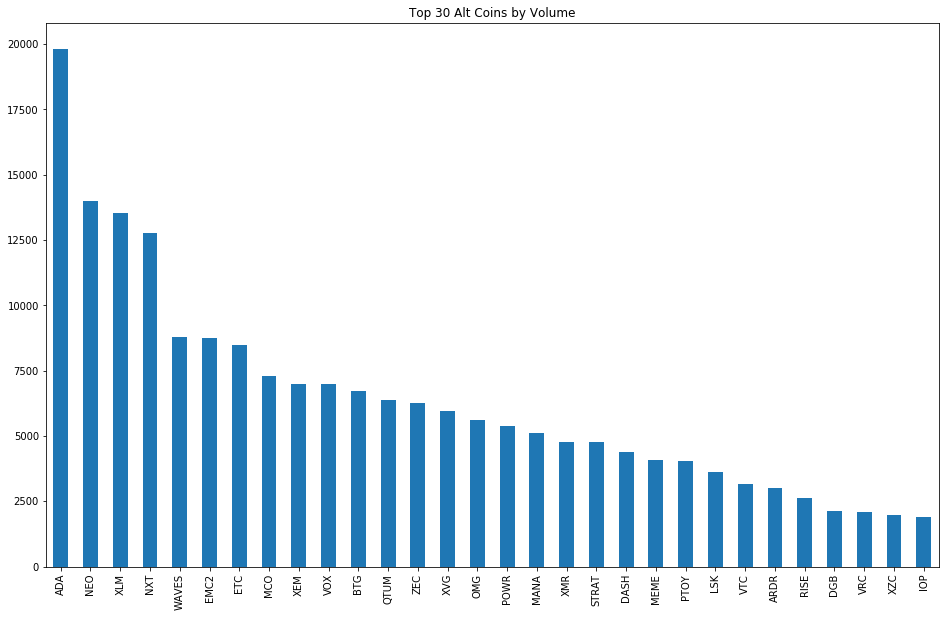

In [172]:
trading_vols.sort_values(ascending=False)[:30].plot(kind='bar',figsize=(16,10))
plt.title('Top 30 Alt Coins by Volume')

should we pick higher volume or lower volume ones?

let's set a threshold at 5000 trading volumes for now

In [128]:
coin_list = list(trading_vols[trading_vols < 5000].index)

# check price correlation

In [151]:
price_cols = [coin+"_price" for coin in coin_list]

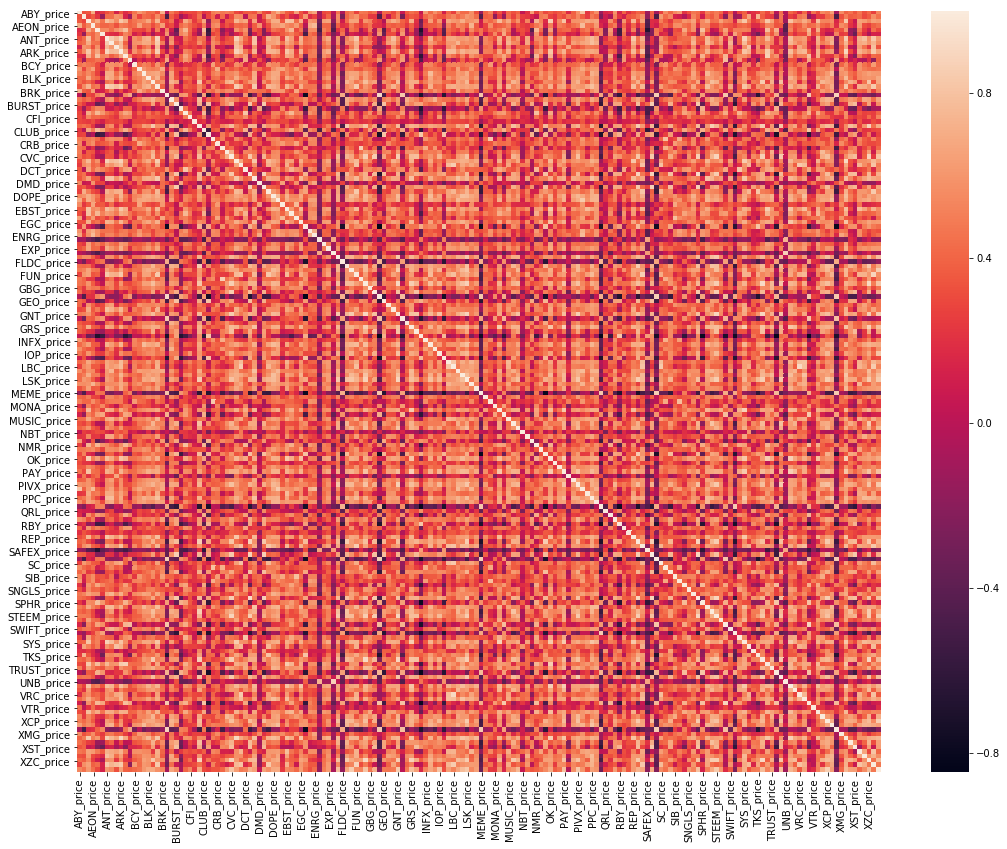

In [171]:
plt.figure(figsize=(18,14))
sns.heatmap(df_all_coins[price_cols].corr())

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X = np.array(df_all_coins[price_cols])
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

Text(0.5,1,'PCA decomposition of prices')

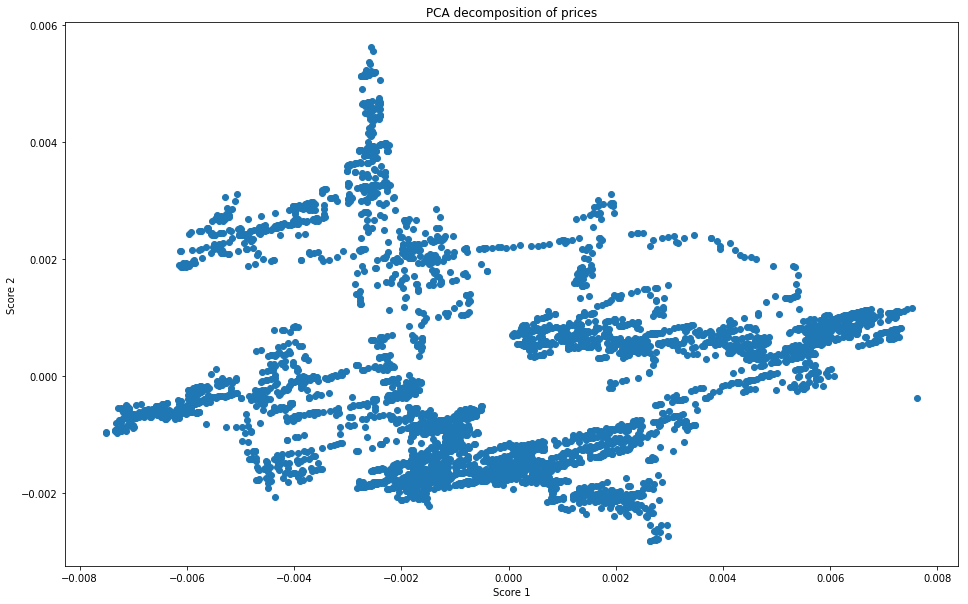

In [175]:
plt.figure(figsize=(16,10))
plt.plot(X[:,0],X[:,1],'o')
plt.xlabel('Score 1')
plt.ylabel('Score 2')
plt.title('PCA decomposition of prices')